### Libraries

In [1]:
import importlib

import config as Config
import constants.labels as Labels
import hangar.FirmBomberFactory as FirmBomberFactory
import hangar.FundBomberFactory as FundBomberFactory
import hangar.DisplayModule as DisplayModule
import models.firm as FirmModel
import models.funding as FundingModel
import models.investor as InvestorModel
import models.macro as MacroModel
import utils.file as FileUtils
import utils.industry as IndustryUtils
import utils.visualiser as Visualiser
import utils.tests as Tests

import numpy as np
import pandas as pd
from linearmodels.panel import PanelOLS
from linearmodels.panel import PooledOLS
import statsmodels.api as sm

def reload():
  importlib.reload(Config)
  importlib.reload(Visualiser)
  importlib.reload(DisplayModule)
  importlib.reload(Tests)
  importlib.reload(FirmBomberFactory)

### Configuration

In [2]:
args = {
  'country': 'united_states',
  'all': False,
}

### Load Data

#### Load Investor Data

In [3]:
# Read Investor Data
investors = FileUtils.read_pickle(f"investors")

In [4]:
# Get Public Funded Investors
public_funded_investors = InvestorModel.get_public_funded_investors(investors)

#### Load Company Data

In [5]:
# Read Company Data
firms = FileUtils.read_pickle(f"{args['country']}_firms")

In [6]:
# Read Domain Data
domain_created_year = FileUtils.read_pickle('domain_created_year')

In [7]:
# Filter and Enrich Company Data
firms = FirmModel.filter_for_profit(firms)
firms = FirmModel.enrich_founded_year(firms, domain_created_year)
firms = FirmModel.filter_founded_year(firms, Config.start_year, Config.end_year)
firms = FirmModel.enrich_public_funded(firms, public_funded_investors)
firms = firms.reset_index(drop=True)

#### Load Funding Data

In [8]:
# Read Funding Data
funding = FileUtils.read_pickle(f"funding")

In [9]:
# Filter and Enrich Funding Data
funding = FundingModel.filter_announced_year(funding, Config.start_year, Config.end_year)
funding = FundingModel.enrich_public_funded(funding, public_funded_investors)

#### Load Macro Data

In [10]:
# Read Macro Data
real_gdp = FileUtils.read_pickle('real_gdp')
fed_rate = FileUtils.read_pickle('fed_rate')

In [11]:
# Filter Macro Data
real_gdp = real_gdp['United States']
real_gdp = real_gdp[real_gdp.index >= Config.start_year]
real_gdp = real_gdp[real_gdp.index < Config.end_year]

fed_rate = fed_rate['Fed Rate']
fed_rate = fed_rate[fed_rate.index >= Config.start_year]
fed_rate = fed_rate[fed_rate.index < Config.end_year]

In [12]:
# Store Macro Data
macro = MacroModel.Macro(real_gdp, fed_rate)

### Load Other Data

In [13]:
# Industry Labels
industry_groups = IndustryUtils.get_industry_groups()
industries = IndustryUtils.get_industries()

### Preprocess Data

In [14]:
# Load Bombers
reload()
# firm_bomber_i = FirmBomberFactory.FirmBomber(firms, targets=industries, target_col=Labels.industries)
firm_bomber_ig = FirmBomberFactory.FirmBomber(firms, targets=industry_groups, target_col=Labels.industry_groups)

In [15]:
# Load Bombers
# fundBomber = BomberFactory.FundBomber(funding, macro)
# fundBomber = BomberFactory.FundBomber(refurb=fundBomber)

### Companies: By Industry

In [16]:
firm_bomber_ig.identify()
firm_bomber_ig.report()
firm_bomber_ig.detailed_report()

TypeError: report() missing 1 required positional argument: 'macro'

### Funding: By Industry

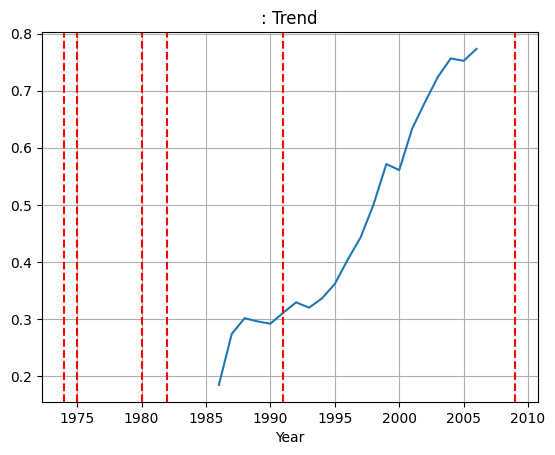

In [ ]:
# fundBomber.identify()
# fundBomber.report()
